In [1]:
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import os
####################you will need to change some paths here!#####################
adir='F:/data/cruise_data/saildrone/baja-2018/'
filename_nc=adir+'saildrone-gen_5-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v2.1535585233403.nc'
#################################################################################
import datetime as dt
import xarray as xr
from datetime import datetime
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

dsx = xr.open_dataset(filename_nc)
#dataset.to_netcdf(filename_out_nc)
#print(dsx)


In [20]:
lats=dsx.latitude[0,:].values
lons=dsx.longitude[0,:].values
skin=dsx.TEMP_IR_UNCOR_MEAN[0,:].values
bulk=dsx.TEMP_CTD_MEAN[0,:].values
bulk2=dsx.TEMP_O2_MEAN[0,:].values
wnd=(dsx.VWND_MEAN[0,:].values**2+dsx.UWND_MEAN[0,:].values**2)**.5
dif=bulk-bulk2
dif2=skin-bulk
pres = dsx.BARO_PRES_MEAN[0,:]
air = dsx.TEMP_AIR_MEAN[0,:]
hum = dsx.RH_MEAN[0,:]
tim = dsx.time[0,:]
wspd = (dsx.UWND_MEAN[0,:]**2 + dsx.VWND_MEAN[0,:]**2)**.5
cond = (dif2>-3)
print(dif2[cond].mean(),dif2[cond].std())

-0.20960594639865995 0.2358626212949851


C:\Users\gentemann\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


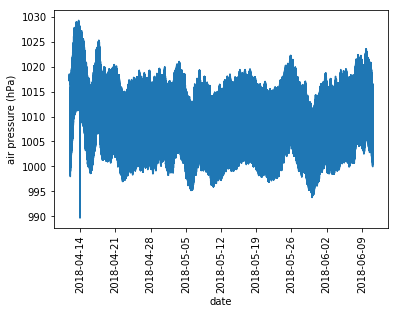

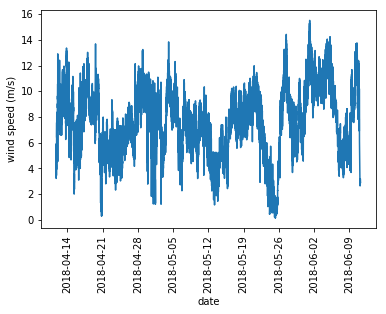

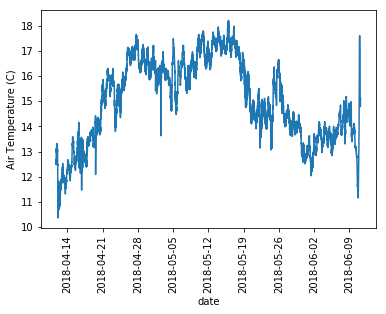

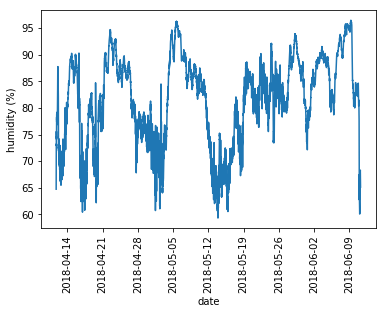

In [21]:
cond = (pres>100)
#pres[cond].plot()
subsety=pres[cond]
subsetx=tim[cond]
fig, ax = plt.subplots(1,1)
ax.plot(subsetx,subsety)
ax.set_xlabel('date')
ax.set_ylabel('air pressure (hPa)')
plt.xticks(rotation=90)
fig.savefig(adir+'figs/pres_ts.png', dpi=300)
cond = (wspd>0)
subsety=wspd[cond]
subsetx=tim[cond]
fig, ax = plt.subplots(1,1)
ax.plot(subsetx,subsety)
ax.set_xlabel('date')
ax.set_ylabel('wind speed (m/s)')
plt.xticks(rotation=90)
fig.savefig(adir+'figs/wnd_ts.png', dpi=300)
cond = (air>0)
subsety=air[cond]
subsetx=tim[cond]
fig, ax = plt.subplots(1,1)
ax.plot(subsetx,subsety)
ax.set_xlabel('date')
ax.set_ylabel('Air Temperature (C)')
plt.xticks(rotation=90)
fig.savefig(adir+'figs/air_ts.png', dpi=300)
cond = (hum>0)
subsety=hum[cond]
subsetx=tim[cond]
fig, ax = plt.subplots(1,1)
ax.plot(subsetx,subsety)
ax.set_xlabel('date')
ax.set_ylabel('humidity (%)')
plt.xticks(rotation=90)
fig.savefig(adir+'figs/hum_ts.png', dpi=300)


In [17]:
print(wnd[cond].max(),wnd[cond].min())

15.51077045152819 0.14142135623730953


In [ ]:
fig, ax = plt.subplots(1,2)
dif=bulk-bulk2
ax[0].plot(wnd,dif,'.')
ax[0].set_xlabel('wind speed (m/s)')
#ax[0].axis([0, 16, -.3, .3])
ax[1].plot(bulk,dif,'.')
ax[1].set_xlabel('CTD SST (C)')
ax[0].set_ylabel('$\Delta$SST')
#ax[1].set_ylabel('$\Delta$SST')
fig.savefig(adir+'figs/o2_minus_ctd_scatter.png', dpi=300)
cond = (dif>-1) & (dif<1)
print(dif[cond].mean(),dif[cond].std())

In [ ]:
import pandas as pd
import numpy as np
t=dsx.TIME[0,:].values
tt=pd.to_datetime(t)
lmt = tt.minute/60+tt.hour + 24.*lons/360.
lmt2=lmt.values
for i in range(0,lmt2.shape[0]):
    if lmt2[i]>=24:
        lmt2[i]=lmt2[i]-24
    if lmt2[i]<0:
        lmt2[i]=lmt2[i]+24
        
#over = lmt > 24
#print(len(over))


In [ ]:
fig, ax = plt.subplots(2)
ax[0].plot(lmt2,bulk-bulk2,'.')
ax[1].plot(bulk,skin-bulk,'.')
